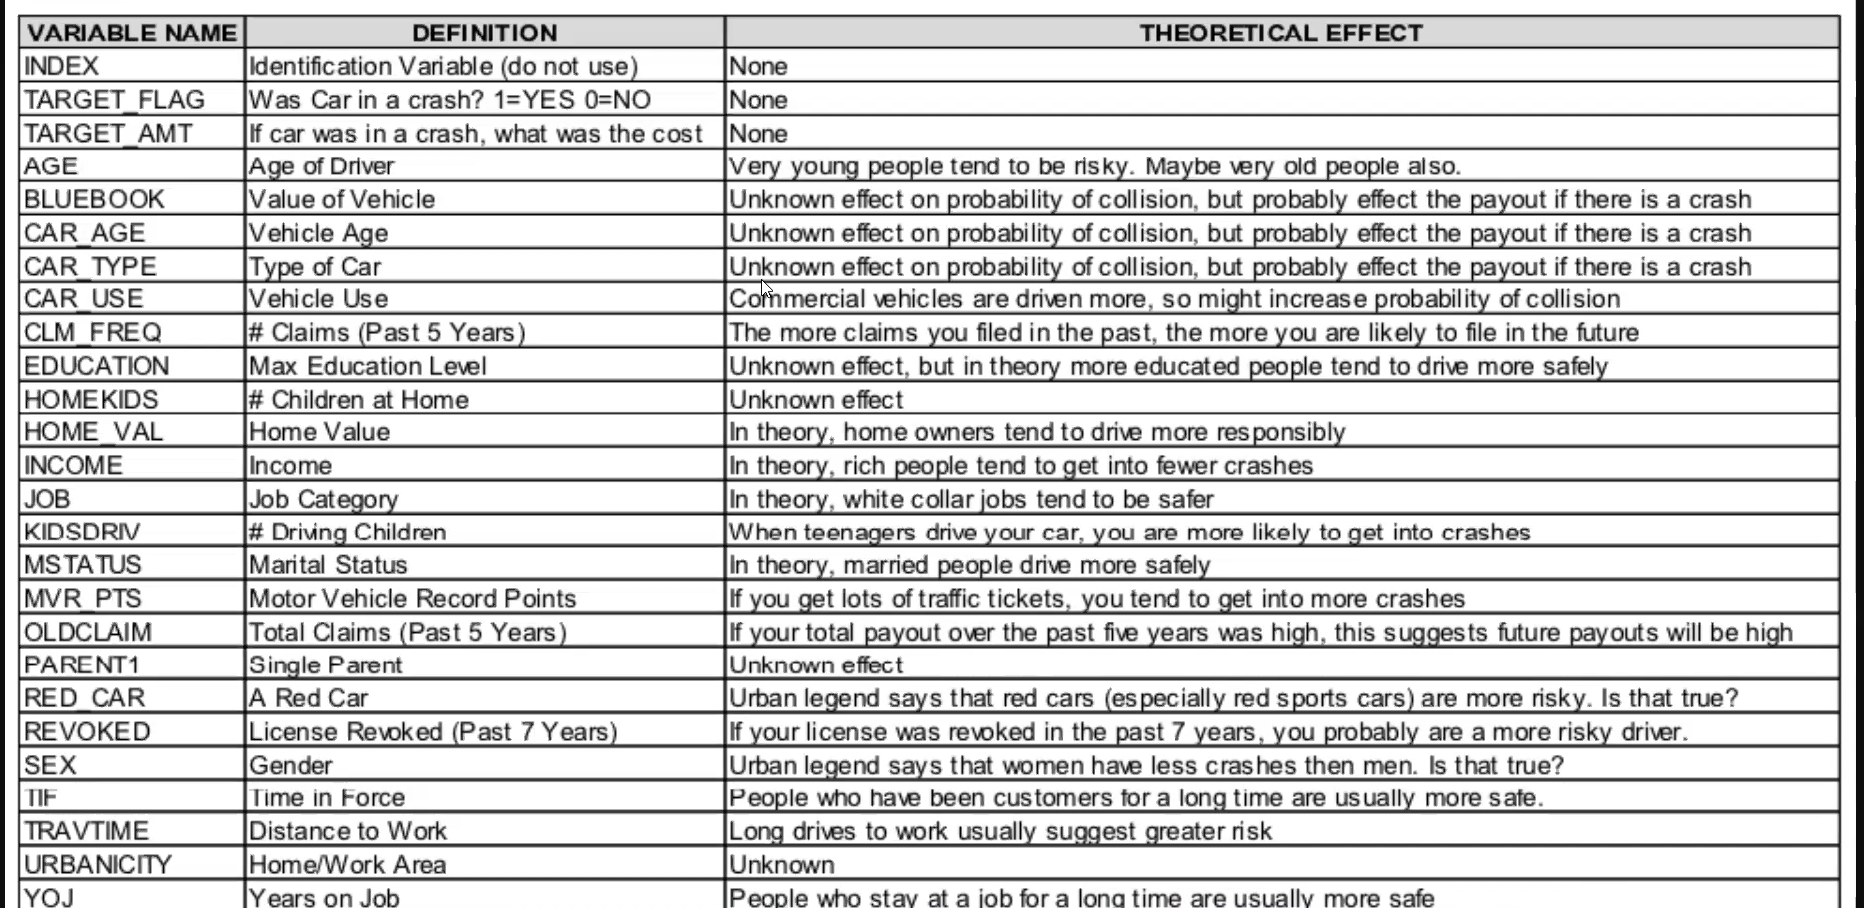

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report

In [2]:
# load dataset
df=pd.read_csv("car_insurance_claim.csv")

In [3]:
pd.set_option('display.max_columns', None)

#### Explore Data

In [4]:
df

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME PARENT1  \
0       63581743         0  16MAR39  60.0         0  11.0   $67,349      No   
1      132761049         0  21JAN56  43.0         0  11.0   $91,449      No   
2      921317019         0  18NOV51  48.0         0  11.0   $52,881      No   
3      727598473         0  05MAR64  35.0         1  10.0   $16,039      No   
4      450221861         0  05JUN48  51.0         0  14.0       NaN      No   
...          ...       ...      ...   ...       ...   ...       ...     ...   
10297   67790126         1  13AUG54  45.0         2   9.0  $164,669      No   
10298   61970712         0  17JUN53  46.0         0   9.0  $107,204      No   
10299  849208064         0  18JUN51  48.0         0  15.0   $39,837      No   
10300  627828331         0  12DEC48  50.0         0   7.0   $43,445      No   
10301  680381960         0  27FEB47  52.0         0  11.0   $53,235      No   

       HOME_VAL MSTATUS GENDER      EDUCATION     OCCUPATION  TRAVTIME  \
0            $0    z_No      M            PhD   Professional        14   
1      $257,252    z_No      M  z_High School  z_Blue Collar        22   
2            $0    z_No      M      Bachelors        Manager        26   
3      $124,191     Yes    z_F  z_High School       Clerical         5   
4      $306,251     Yes      M   <High School  z_Blue Collar        32   
...         ...     ...    ...            ...            ...       ...   
10297  $386,273     Yes      M            PhD        Manager        21   
10298  $332,591     Yes      M        Masters            NaN        36   
10299  $170,611     Yes    z_F   <High School  z_Blue Collar        12   
10300  $149,248     Yes    z_F      Bachelors     Home Maker        36   
10301  $197,017     Yes    z_F  z_High School       Clerical        64   

          CAR_USE BLUEBOOK  TIF     CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ  \
0         Private  $14,230   11      Minivan     yes   $4,461         2   
1      Commercial  $14,940    1      Minivan     yes       $0         0   
2         Private  $21,970    1          Van     yes       $0         0   
3         Private   $4,010    4        z_SUV      no  $38,690         2   
4         Private  $15,440    7      Minivan     yes       $0         0   
...           ...      ...  ...          ...     ...      ...       ...   
10297     Private  $13,270   15      Minivan      no       $0         0   
10298  Commercial  $24,490    6  Panel Truck      no       $0         0   
10299     Private  $13,820    7        z_SUV      no       $0         0   
10300     Private  $22,550    6      Minivan      no       $0         0   
10301     Private  $19,400    6      Minivan      no       $0         0   

      REVOKED  MVR_PTS CLM_AMT  CAR_AGE  CLAIM_FLAG             URBANICITY  
0          No        3      $0     18.0           0    Highly Urban/ Urban  
1          No        0      $0      1.0           0    Highly Urban/ Urban  
2          No        2      $0     10.0           0    Highly Urban/ Urban  
3          No        3      $0     10.0           0    Highly Urban/ Urban  
4          No        0      $0      6.0           0    Highly Urban/ Urban  
...       ...      ...     ...      ...         ...                    ...  
10297      No        2      $0     17.0           0    Highly Urban/ Urban  
10298      No        0      $0      1.0           0    Highly Urban/ Urban  
10299      No        0      $0      1.0           0    Highly Urban/ Urban  
10300      No        0      $0     11.0           0    Highly Urban/ Urban  
10301      No        0      $0      9.0           0  z_Highly Rural/ Rural  

[10302 rows x 27 columns]

In [5]:
df.head()

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ   INCOME PARENT1  \
0   63581743         0  16MAR39  60.0         0  11.0  $67,349      No   
1  132761049         0  21JAN56  43.0         0  11.0  $91,449      No   
2  921317019         0  18NOV51  48.0         0  11.0  $52,881      No   
3  727598473         0  05MAR64  35.0         1  10.0  $16,039      No   
4  450221861         0  05JUN48  51.0         0  14.0      NaN      No   

   HOME_VAL MSTATUS GENDER      EDUCATION     OCCUPATION  TRAVTIME  \
0        $0    z_No      M            PhD   Professional        14   
1  $257,252    z_No      M  z_High School  z_Blue Collar        22   
2        $0    z_No      M      Bachelors        Manager        26   
3  $124,191     Yes    z_F  z_High School       Clerical         5   
4  $306,251     Yes      M   <High School  z_Blue Collar        32   

      CAR_USE BLUEBOOK  TIF CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ REVOKED  \
0     Private  $14,230   11  Minivan     yes   $4,461         2      No   
1  Commercial  $14,940    1  Minivan     yes       $0         0      No   
2     Private  $21,970    1      Van     yes       $0         0      No   
3     Private   $4,010    4    z_SUV      no  $38,690         2      No   
4     Private  $15,440    7  Minivan     yes       $0         0      No   

   MVR_PTS CLM_AMT  CAR_AGE  CLAIM_FLAG           URBANICITY  
0        3      $0     18.0           0  Highly Urban/ Urban  
1        0      $0      1.0           0  Highly Urban/ Urban  
2        2      $0     10.0           0  Highly Urban/ Urban  
3        3      $0     10.0           0  Highly Urban/ Urban  
4        0      $0      6.0           0  Highly Urban/ Urban

In [6]:
df.tail()

ID  KIDSDRIV    BIRTH   AGE  HOMEKIDS   YOJ    INCOME PARENT1  \
10297   67790126         1  13AUG54  45.0         2   9.0  $164,669      No   
10298   61970712         0  17JUN53  46.0         0   9.0  $107,204      No   
10299  849208064         0  18JUN51  48.0         0  15.0   $39,837      No   
10300  627828331         0  12DEC48  50.0         0   7.0   $43,445      No   
10301  680381960         0  27FEB47  52.0         0  11.0   $53,235      No   

       HOME_VAL MSTATUS GENDER      EDUCATION     OCCUPATION  TRAVTIME  \
10297  $386,273     Yes      M            PhD        Manager        21   
10298  $332,591     Yes      M        Masters            NaN        36   
10299  $170,611     Yes    z_F   <High School  z_Blue Collar        12   
10300  $149,248     Yes    z_F      Bachelors     Home Maker        36   
10301  $197,017     Yes    z_F  z_High School       Clerical        64   

          CAR_USE BLUEBOOK  TIF     CAR_TYPE RED_CAR OLDCLAIM  CLM_FREQ  \
10297     Private  $13,270   15      Minivan      no       $0         0   
10298  Commercial  $24,490    6  Panel Truck      no       $0         0   
10299     Private  $13,820    7        z_SUV      no       $0         0   
10300     Private  $22,550    6      Minivan      no       $0         0   
10301     Private  $19,400    6      Minivan      no       $0         0   

      REVOKED  MVR_PTS CLM_AMT  CAR_AGE  CLAIM_FLAG             URBANICITY  
10297      No        2      $0     17.0           0    Highly Urban/ Urban  
10298      No        0      $0      1.0           0    Highly Urban/ Urban  
10299      No        0      $0      1.0           0    Highly Urban/ Urban  
10300      No        0      $0     11.0           0    Highly Urban/ Urban  
10301      No        0      $0      9.0           0  z_Highly Rural/ Rural

In [7]:
df.shape

(10302, 27)

In [8]:
df.columns

Index(['ID', 'KIDSDRIV', 'BIRTH', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'GENDER', 'EDUCATION', 'OCCUPATION',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CLM_AMT', 'CAR_AGE',
       'CLAIM_FLAG', 'URBANICITY'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [10]:
# income to float
# home value to float
# OLDCLAIM to float
# CLM_AMT to float 


In [11]:
df.describe().round(2)

ID  KIDSDRIV       AGE  HOMEKIDS      YOJ  TRAVTIME  \
count  1.030200e+04  10302.00  10295.00  10302.00  9754.00  10302.00   
mean   4.956631e+08      0.17     44.84      0.72    10.47     33.42   
std    2.864675e+08      0.51      8.61      1.12     4.11     15.87   
min    6.317500e+04      0.00     16.00      0.00     0.00      5.00   
25%    2.442869e+08      0.00     39.00      0.00     9.00     22.00   
50%    4.970043e+08      0.00     45.00      0.00    11.00     33.00   
75%    7.394551e+08      0.00     51.00      1.00    13.00     44.00   
max    9.999264e+08      4.00     81.00      5.00    23.00    142.00   

            TIF  CLM_FREQ   MVR_PTS  CAR_AGE  CLAIM_FLAG  
count  10302.00  10302.00  10302.00  9663.00    10302.00  
mean       5.33      0.80      1.71     8.30        0.27  
std        4.11      1.15      2.16     5.71        0.44  
min        1.00      0.00      0.00    -3.00        0.00  
25%        1.00      0.00      0.00     1.00        0.00  
50%        4.00      0.00      1.00     8.00        0.00  
75%        7.00      2.00      3.00    12.00        1.00  
max       25.00      5.00     13.00    28.00        1.00

In [12]:
df.describe(include="object").T

count unique                  top  freq
BIRTH       10302   6560              20OCT60     8
INCOME       9732   8151                   $0   797
PARENT1     10302      2                   No  8959
HOME_VAL     9727   6334                   $0  2908
MSTATUS     10302      2                  Yes  6188
GENDER      10302      2                  z_F  5545
EDUCATION   10302      5        z_High School  2952
OCCUPATION   9637      8        z_Blue Collar  2288
CAR_USE     10302      2              Private  6513
BLUEBOOK    10302   2985               $1,500   207
CAR_TYPE    10302      6                z_SUV  2883
RED_CAR     10302      2                   no  7326
OLDCLAIM    10302   3545                   $0  6292
REVOKED     10302      2                   No  9041
CLM_AMT     10302   2346                   $0  7556
URBANICITY  10302      2  Highly Urban/ Urban  8230

<Axes: >

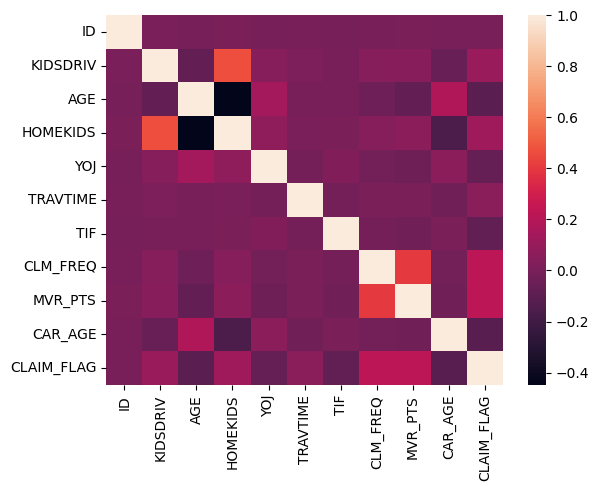

In [13]:
sns.heatmap(df.select_dtypes(include=['int','float']).corr(),annot=False)

In [14]:
#check null by count 
df.isna().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [15]:
#check null by prcentege
df.isna().sum()/df.shape[0]*100

ID            0.000000
KIDSDRIV      0.000000
BIRTH         0.000000
AGE           0.067948
HOMEKIDS      0.000000
YOJ           5.319355
INCOME        5.532906
PARENT1       0.000000
HOME_VAL      5.581440
MSTATUS       0.000000
GENDER        0.000000
EDUCATION     0.000000
OCCUPATION    6.455057
TRAVTIME      0.000000
CAR_USE       0.000000
BLUEBOOK      0.000000
TIF           0.000000
CAR_TYPE      0.000000
RED_CAR       0.000000
OLDCLAIM      0.000000
CLM_FREQ      0.000000
REVOKED       0.000000
MVR_PTS       0.000000
CLM_AMT       0.000000
CAR_AGE       6.202679
CLAIM_FLAG    0.000000
URBANICITY    0.000000
dtype: float64

<Axes: >

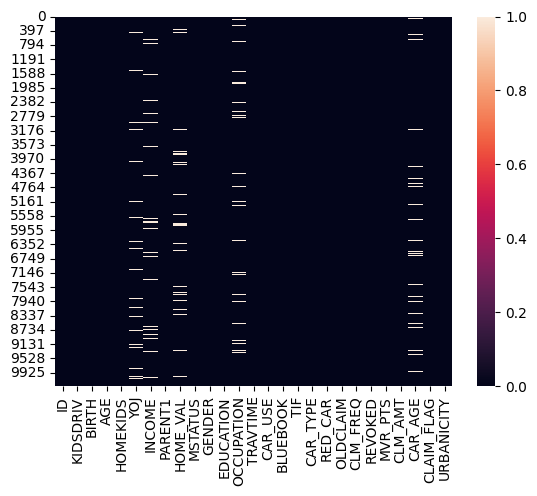

In [16]:
sns.heatmap(df.isna())

In [17]:
df[(df.YOJ.isna()) & (df.AGE.isna())& (df.INCOME.isna()) & (df.CAR_AGE.isna())& (df.OCCUPATION.isna()) & (df.HOME_VAL.isna()) ]


Empty DataFrame
Columns: [ID, KIDSDRIV, BIRTH, AGE, HOMEKIDS, YOJ, INCOME, PARENT1, HOME_VAL, MSTATUS, GENDER, EDUCATION, OCCUPATION, TRAVTIME, CAR_USE, BLUEBOOK, TIF, CAR_TYPE, RED_CAR, OLDCLAIM, CLM_FREQ, REVOKED, MVR_PTS, CLM_AMT, CAR_AGE, CLAIM_FLAG, URBANICITY]
Index: []

In [18]:
df[(df.YOJ.isna()) & (df.INCOME.isna()) & (df.CAR_AGE.isna())& (df.OCCUPATION.isna()) & (df.HOME_VAL.isna()) ]


Empty DataFrame
Columns: [ID, KIDSDRIV, BIRTH, AGE, HOMEKIDS, YOJ, INCOME, PARENT1, HOME_VAL, MSTATUS, GENDER, EDUCATION, OCCUPATION, TRAVTIME, CAR_USE, BLUEBOOK, TIF, CAR_TYPE, RED_CAR, OLDCLAIM, CLM_FREQ, REVOKED, MVR_PTS, CLM_AMT, CAR_AGE, CLAIM_FLAG, URBANICITY]
Index: []

In [19]:
# Check the remaining percentage of data after removing rows with missing values
(df.dropna(subset= ['YOJ', 'INCOME', 'HOME_VAL', 'OCCUPATION', 'CAR_AGE']).shape[0] / df.shape[0]) * 100

74.36420112599495

In [20]:
df.isna().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [21]:
df.duplicated().sum()

1

#### Data Cleaning

In [22]:
df.columns= df.columns.str.lower().str.replace(" ","")
df.columns

Index(['id', 'kidsdriv', 'birth', 'age', 'homekids', 'yoj', 'income',
       'parent1', 'home_val', 'mstatus', 'gender', 'education', 'occupation',
       'travtime', 'car_use', 'bluebook', 'tif', 'car_type', 'red_car',
       'oldclaim', 'clm_freq', 'revoked', 'mvr_pts', 'clm_amt', 'car_age',
       'claim_flag', 'urbanicity'],
      dtype='object')

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.reset_index(drop=True,inplace=True)

In [25]:
catogrical =df.select_dtypes(include="object")
catogrical

birth    income parent1  home_val mstatus gender      education  \
0      16MAR39   $67,349      No        $0    z_No      M            PhD   
1      21JAN56   $91,449      No  $257,252    z_No      M  z_High School   
2      18NOV51   $52,881      No        $0    z_No      M      Bachelors   
3      05MAR64   $16,039      No  $124,191     Yes    z_F  z_High School   
4      05JUN48       NaN      No  $306,251     Yes      M   <High School   
...        ...       ...     ...       ...     ...    ...            ...   
10296  13AUG54  $164,669      No  $386,273     Yes      M            PhD   
10297  17JUN53  $107,204      No  $332,591     Yes      M        Masters   
10298  18JUN51   $39,837      No  $170,611     Yes    z_F   <High School   
10299  12DEC48   $43,445      No  $149,248     Yes    z_F      Bachelors   
10300  27FEB47   $53,235      No  $197,017     Yes    z_F  z_High School   

          occupation     car_use bluebook     car_type red_car oldclaim  \
0       Professional     Private  $14,230      Minivan     yes   $4,461   
1      z_Blue Collar  Commercial  $14,940      Minivan     yes       $0   
2            Manager     Private  $21,970          Van     yes       $0   
3           Clerical     Private   $4,010        z_SUV      no  $38,690   
4      z_Blue Collar     Private  $15,440      Minivan     yes       $0   
...              ...         ...      ...          ...     ...      ...   
10296        Manager     Private  $13,270      Minivan      no       $0   
10297            NaN  Commercial  $24,490  Panel Truck      no       $0   
10298  z_Blue Collar     Private  $13,820        z_SUV      no       $0   
10299     Home Maker     Private  $22,550      Minivan      no       $0   
10300       Clerical     Private  $19,400      Minivan      no       $0   

      revoked clm_amt             urbanicity  
0          No      $0    Highly Urban/ Urban  
1          No      $0    Highly Urban/ Urban  
2          No      $0    Highly Urban/ Urban  
3          No      $0    Highly Urban/ Urban  
4          No      $0    Highly Urban/ Urban  
...       ...     ...                    ...  
10296      No      $0    Highly Urban/ Urban  
10297      No      $0    Highly Urban/ Urban  
10298      No      $0    Highly Urban/ Urban  
10299      No      $0    Highly Urban/ Urban  
10300      No      $0  z_Highly Rural/ Rural  

[10301 rows x 16 columns]

In [26]:
df.occupation.value_counts()

occupation
z_Blue Collar    2288
Clerical         1590
Professional     1407
Manager          1257
Lawyer           1031
Student           899
Home Maker        843
Doctor            321
Name: count, dtype: int64

In [27]:
# we can fill using Unknown or leave it with missing values
df.occupation=df.occupation.fillna('Unknown')

In [28]:
for i in catogrical.columns:
    print ([i])
    print(df[i].nunique())
    print(df[i].unique(),"\n","="*100)
    

['birth']
6560
['16MAR39' '21JAN56' '18NOV51' ... '13AUG54' '18JUN51' '27FEB47'] 
['income']
8151
['$67,349' '$91,449' '$52,881' ... '$164,669' '$107,204' '$53,235'] 
['parent1']
2
['No' 'Yes'] 
['home_val']
6334
['$0' '$257,252' '$124,191' ... '$332,591' '$170,611' '$197,017'] 
['mstatus']
2
['z_No' 'Yes'] 
['gender']
2
['M' 'z_F'] 
['education']
5
['PhD' 'z_High School' 'Bachelors' '<High School' 'Masters'] 
['occupation']
9
['Professional' 'z_Blue Collar' 'Manager' 'Clerical' 'Doctor' 'Lawyer'
 'Unknown' 'Home Maker' 'Student'] 
['car_use']
2
['Private' 'Commercial'] 
['bluebook']
2985
['$14,230' '$14,940' '$21,970' ... '$2,790' '$28,490' '$32,960'] 
['car_type']
6
['Minivan' 'Van' 'z_SUV' 'Sports Car' 'Panel Truck' 'Pickup'] 
['red_car']
2
['yes' 'no'] 
['oldclaim']
3545
['$4,461' '$0' '$38,690' ... '$33,026' '$3,995' '$9,245'] 
['revoked']
2
['No' 'Yes'] 
['clm_amt']
2346
['$0' '$2,946' '$6,477' ... '$3,106' '$3,135' '$1,815'] 
['urbanicity']
2
['Highly Urban/ Urban' 'z_Highly Rur

In [29]:
# gender remove z_
# mstatus remove z_
# occupation remove  z_
#car_type remove z_
# urbanicity remove z_


In [30]:
remove_z_string = ['mstatus', 'gender', 'education', 'occupation', 'car_type', 'urbanicity']
remove_z_string

['mstatus', 'gender', 'education', 'occupation', 'car_type', 'urbanicity']

In [31]:
def remove__z(x):
      if 'z_' in x :
            return x.replace('z_','')
      
      else:
            return x


In [32]:
for i in remove_z_string:
    df[i]=df[i].apply(remove__z)

In [33]:
df[['education', 'gender', 'car_type', 'mstatus', 'occupation']]

education gender     car_type mstatus    occupation
0               PhD      M      Minivan      No  Professional
1       High School      M      Minivan      No   Blue Collar
2         Bachelors      M          Van      No       Manager
3       High School      F          SUV     Yes      Clerical
4      <High School      M      Minivan     Yes   Blue Collar
...             ...    ...          ...     ...           ...
10296           PhD      M      Minivan     Yes       Manager
10297       Masters      M  Panel Truck     Yes       Unknown
10298  <High School      F          SUV     Yes   Blue Collar
10299     Bachelors      F      Minivan     Yes    Home Maker
10300   High School      F      Minivan     Yes      Clerical

[10301 rows x 5 columns]

In [34]:
num_column = ['income', 'home_val', 'oldclaim', 'clm_amt','bluebook']

In [35]:
def clean(x):
    if type(x)==float:
        return x 
    
    elif ('$'in x ) or (','in x):
        return x.replace("$","").replace(",","")
    else:
        return x

In [36]:
for i in num_column:
    df[i]=df[i].apply(clean).astype("float")

In [37]:
df[['income', 'home_val', 'oldclaim', 'clm_amt']]

income  home_val  oldclaim  clm_amt
0       67349.0       0.0    4461.0      0.0
1       91449.0  257252.0       0.0      0.0
2       52881.0       0.0       0.0      0.0
3       16039.0  124191.0   38690.0      0.0
4           NaN  306251.0       0.0      0.0
...         ...       ...       ...      ...
10296  164669.0  386273.0       0.0      0.0
10297  107204.0  332591.0       0.0      0.0
10298   39837.0  170611.0       0.0      0.0
10299   43445.0  149248.0       0.0      0.0
10300   53235.0  197017.0       0.0      0.0

[10301 rows x 4 columns]

In [38]:
df.dtypes

id              int64
kidsdriv        int64
birth          object
age           float64
homekids        int64
yoj           float64
income        float64
parent1        object
home_val      float64
mstatus        object
gender         object
education      object
occupation     object
travtime        int64
car_use        object
bluebook      float64
tif             int64
car_type       object
red_car        object
oldclaim      float64
clm_freq        int64
revoked        object
mvr_pts         int64
clm_amt       float64
car_age       float64
claim_flag      int64
urbanicity     object
dtype: object

In [39]:
numerical=df.select_dtypes(include=["int","float"])
numerical

id  kidsdriv   age  homekids   yoj    income  home_val  \
0       63581743         0  60.0         0  11.0   67349.0       0.0   
1      132761049         0  43.0         0  11.0   91449.0  257252.0   
2      921317019         0  48.0         0  11.0   52881.0       0.0   
3      727598473         0  35.0         1  10.0   16039.0  124191.0   
4      450221861         0  51.0         0  14.0       NaN  306251.0   
...          ...       ...   ...       ...   ...       ...       ...   
10296   67790126         1  45.0         2   9.0  164669.0  386273.0   
10297   61970712         0  46.0         0   9.0  107204.0  332591.0   
10298  849208064         0  48.0         0  15.0   39837.0  170611.0   
10299  627828331         0  50.0         0   7.0   43445.0  149248.0   
10300  680381960         0  52.0         0  11.0   53235.0  197017.0   

       travtime  bluebook  tif  oldclaim  clm_freq  mvr_pts  clm_amt  car_age  \
0            14   14230.0   11    4461.0         2        3      0.0     18.0   
1            22   14940.0    1       0.0         0        0      0.0      1.0   
2            26   21970.0    1       0.0         0        2      0.0     10.0   
3             5    4010.0    4   38690.0         2        3      0.0     10.0   
4            32   15440.0    7       0.0         0        0      0.0      6.0   
...         ...       ...  ...       ...       ...      ...      ...      ...   
10296        21   13270.0   15       0.0         0        2      0.0     17.0   
10297        36   24490.0    6       0.0         0        0      0.0      1.0   
10298        12   13820.0    7       0.0         0        0      0.0      1.0   
10299        36   22550.0    6       0.0         0        0      0.0     11.0   
10300        64   19400.0    6       0.0         0        0      0.0      9.0   

       claim_flag  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
10296           0  
10297           0  
10298           0  
10299           0  
10300           0  

[10301 rows x 16 columns]

In [40]:
for i in numerical.columns:
    px.histogram(df[i],title=i).show()

In [41]:
df.car_age=df.car_age.abs()

In [42]:
px.histogram(df.car_age)

id


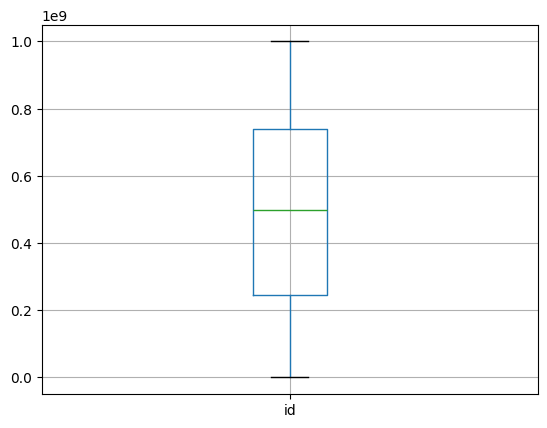

----------------------------------------------------------------------------------------------------
kidsdriv


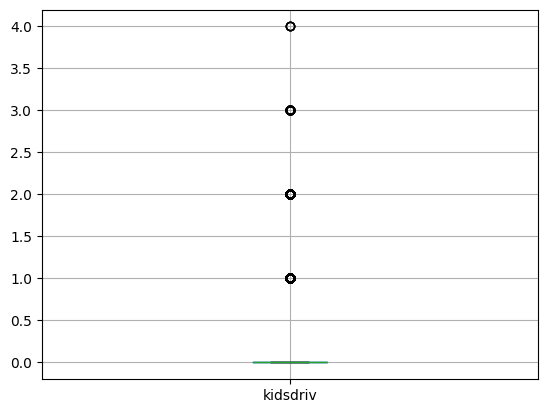

----------------------------------------------------------------------------------------------------
age


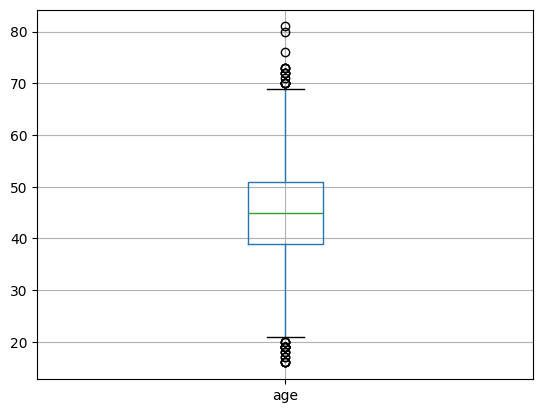

----------------------------------------------------------------------------------------------------
homekids


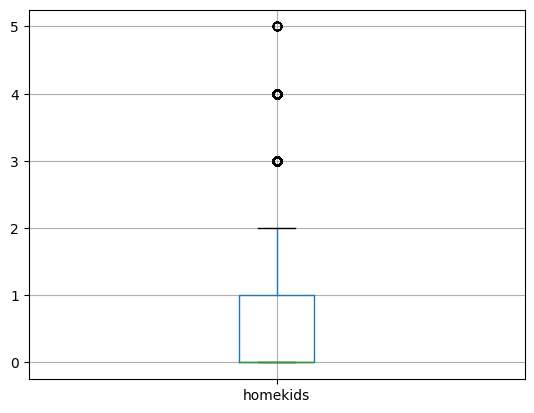

----------------------------------------------------------------------------------------------------
yoj


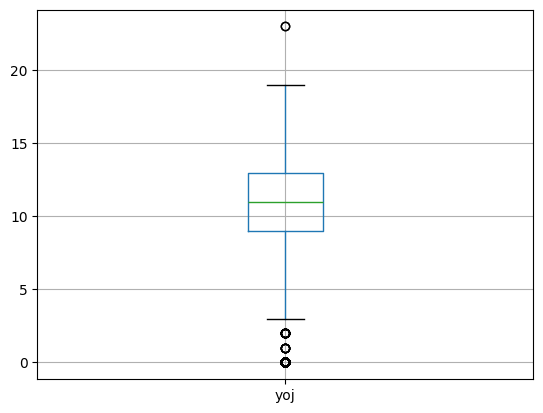

----------------------------------------------------------------------------------------------------
income


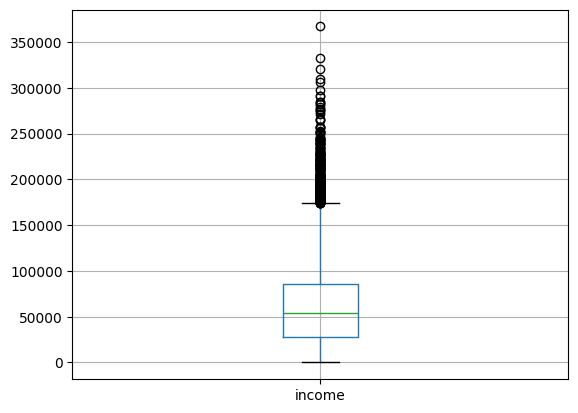

----------------------------------------------------------------------------------------------------
home_val


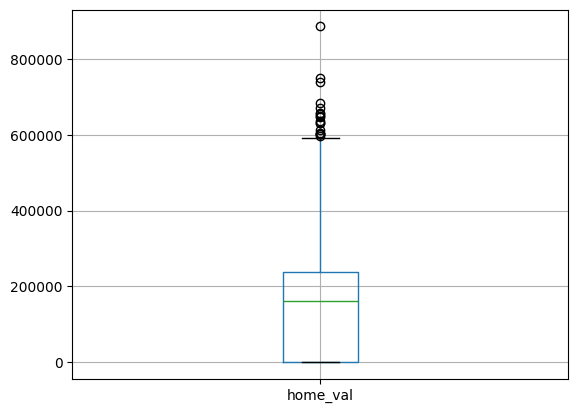

----------------------------------------------------------------------------------------------------
travtime


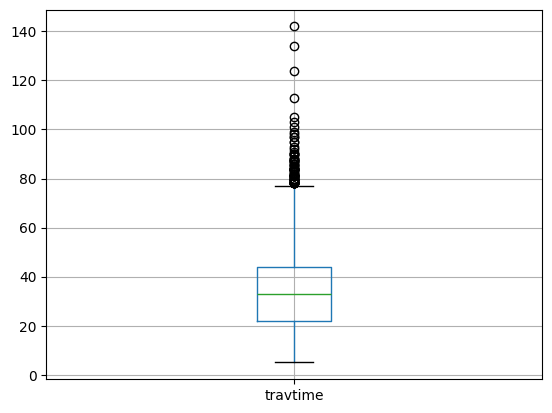

----------------------------------------------------------------------------------------------------
bluebook


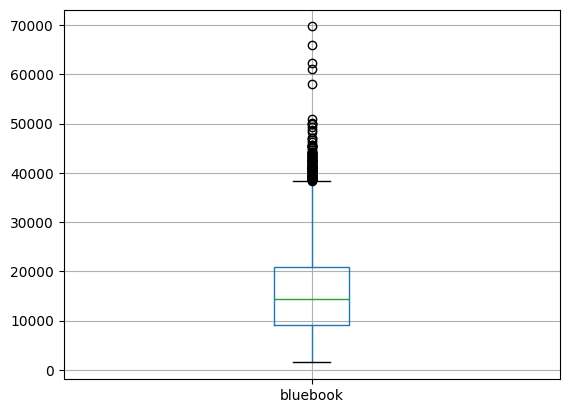

----------------------------------------------------------------------------------------------------
tif


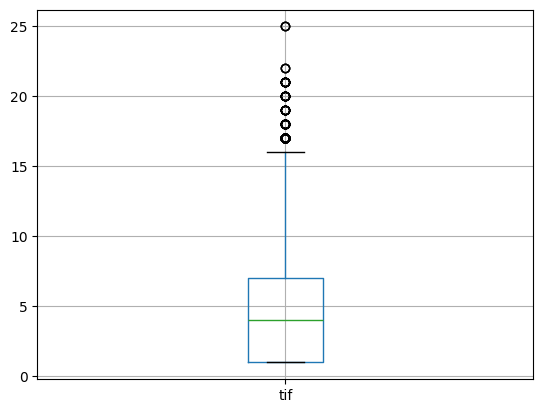

----------------------------------------------------------------------------------------------------
oldclaim


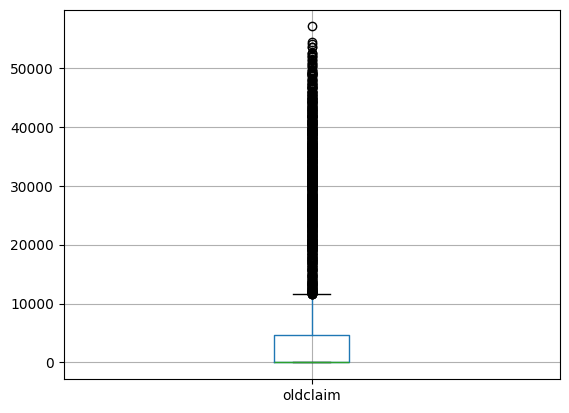

----------------------------------------------------------------------------------------------------
clm_freq


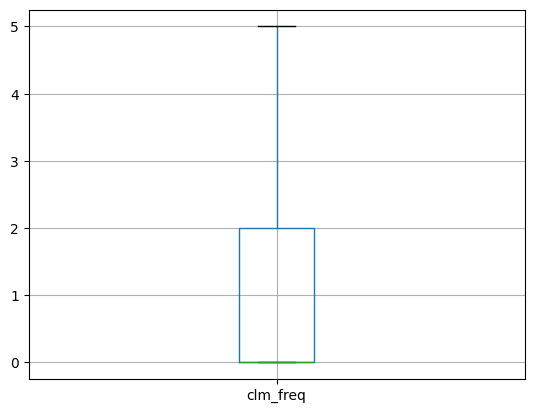

----------------------------------------------------------------------------------------------------
mvr_pts


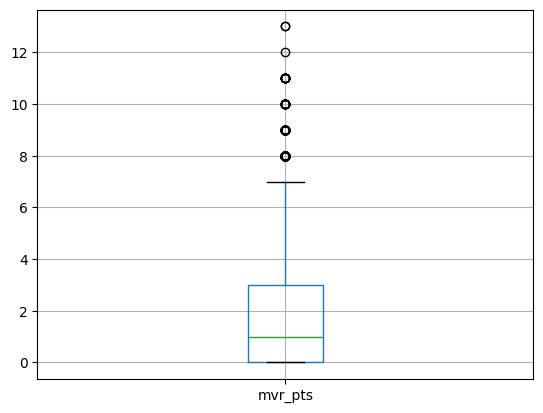

----------------------------------------------------------------------------------------------------
clm_amt


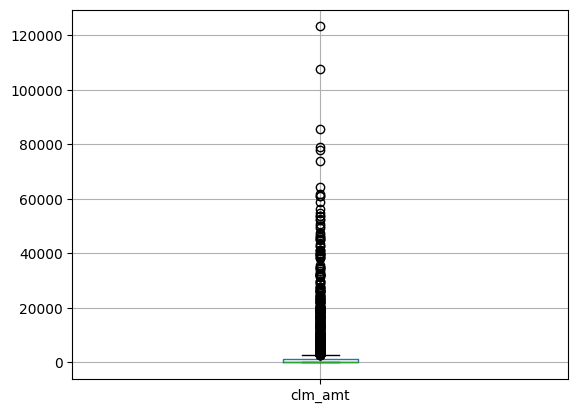

----------------------------------------------------------------------------------------------------
car_age


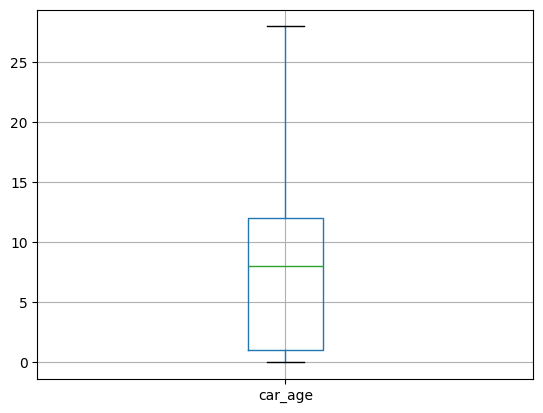

----------------------------------------------------------------------------------------------------
claim_flag


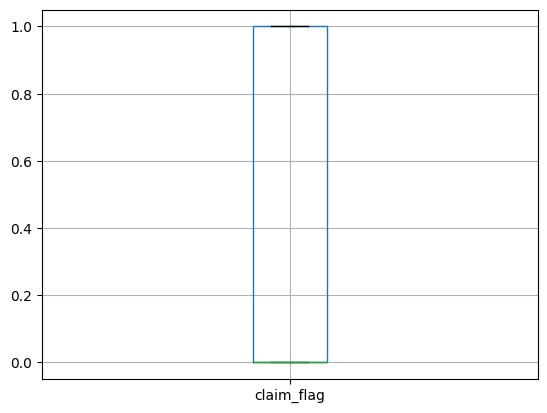

----------------------------------------------------------------------------------------------------


In [43]:
import matplotlib.pyplot as plt

for i in numerical.columns:
        print(i)
        df.boxplot(column=i)
        plt.show()
        print("-"*100)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10301 entries, 0 to 10300
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          10301 non-null  int64  
 1   kidsdriv    10301 non-null  int64  
 2   birth       10301 non-null  object 
 3   age         10294 non-null  float64
 4   homekids    10301 non-null  int64  
 5   yoj         9753 non-null   float64
 6   income      9731 non-null   float64
 7   parent1     10301 non-null  object 
 8   home_val    9726 non-null   float64
 9   mstatus     10301 non-null  object 
 10  gender      10301 non-null  object 
 11  education   10301 non-null  object 
 12  occupation  10301 non-null  object 
 13  travtime    10301 non-null  int64  
 14  car_use     10301 non-null  object 
 15  bluebook    10301 non-null  float64
 16  tif         10301 non-null  int64  
 17  car_type    10301 non-null  object 
 18  red_car     10301 non-null  object 
 19  oldclaim    10301 non-nul

In [45]:
df.drop(['id', 'birth'], axis= 1, inplace= True)
df

kidsdriv   age  homekids   yoj    income parent1  home_val mstatus  \
0             0  60.0         0  11.0   67349.0      No       0.0      No   
1             0  43.0         0  11.0   91449.0      No  257252.0      No   
2             0  48.0         0  11.0   52881.0      No       0.0      No   
3             0  35.0         1  10.0   16039.0      No  124191.0     Yes   
4             0  51.0         0  14.0       NaN      No  306251.0     Yes   
...         ...   ...       ...   ...       ...     ...       ...     ...   
10296         1  45.0         2   9.0  164669.0      No  386273.0     Yes   
10297         0  46.0         0   9.0  107204.0      No  332591.0     Yes   
10298         0  48.0         0  15.0   39837.0      No  170611.0     Yes   
10299         0  50.0         0   7.0   43445.0      No  149248.0     Yes   
10300         0  52.0         0  11.0   53235.0      No  197017.0     Yes   

      gender     education    occupation  travtime     car_use  bluebook  tif  \
0          M           PhD  Professional        14     Private   14230.0   11   
1          M   High School   Blue Collar        22  Commercial   14940.0    1   
2          M     Bachelors       Manager        26     Private   21970.0    1   
3          F   High School      Clerical         5     Private    4010.0    4   
4          M  <High School   Blue Collar        32     Private   15440.0    7   
...      ...           ...           ...       ...         ...       ...  ...   
10296      M           PhD       Manager        21     Private   13270.0   15   
10297      M       Masters       Unknown        36  Commercial   24490.0    6   
10298      F  <High School   Blue Collar        12     Private   13820.0    7   
10299      F     Bachelors    Home Maker        36     Private   22550.0    6   
10300      F   High School      Clerical        64     Private   19400.0    6   

          car_type red_car  oldclaim  clm_freq revoked  mvr_pts  clm_amt  \
0          Minivan     yes    4461.0         2      No        3      0.0   
1          Minivan     yes       0.0         0      No        0      0.0   
2              Van     yes       0.0         0      No        2      0.0   
3              SUV      no   38690.0         2      No        3      0.0   
4          Minivan     yes       0.0         0      No        0      0.0   
...            ...     ...       ...       ...     ...      ...      ...   
10296      Minivan      no       0.0         0      No        2      0.0   
10297  Panel Truck      no       0.0         0      No        0      0.0   
10298          SUV      no       0.0         0      No        0      0.0   
10299      Minivan      no       0.0         0      No        0      0.0   
10300      Minivan      no       0.0         0      No        0      0.0   

       car_age  claim_flag           urbanicity  
0         18.0           0  Highly Urban/ Urban  
1          1.0           0  Highly Urban/ Urban  
2         10.0           0  Highly Urban/ Urban  
3         10.0           0  Highly Urban/ Urban  
4          6.0           0  Highly Urban/ Urban  
...        ...         ...                  ...  
10296     17.0           0  Highly Urban/ Urban  
10297      1.0           0  Highly Urban/ Urban  
10298      1.0           0  Highly Urban/ Urban  
10299     11.0           0  Highly Urban/ Urban  
10300      9.0           0  Highly Rural/ Rural  

[10301 rows x 25 columns]

In [46]:
from datasist.structdata import detect_outliers
outlier_indices=detect_outliers(df,0,['car_age', 'mvr_pts','oldclaim','kidsdriv','age','tif','travtime','home_val','yoj','homekids','income','clm_amt' ])
print(len(outlier_indices))
print(outlier_indices)

4082
[10, 60, 75, 185, 282, 289, 306, 322, 347, 389, 465, 468, 541, 600, 661, 697, 715, 746, 852, 903, 1136, 1148, 1213, 1219, 1223, 1344, 1413, 1521, 1532, 1639, 1672, 1687, 1689, 1727, 1793, 1823, 1872, 1892, 1914, 1934, 1963, 2058, 2082, 2093, 2117, 2240, 2310, 2362, 2440, 2477, 2503, 2513, 2532, 2544, 2607, 2670, 2672, 2685, 2694, 2704, 2858, 2902, 2916, 2975, 3008, 3065, 3088, 3136, 3234, 3263, 3331, 3343, 3354, 3362, 3400, 3445, 3488, 3504, 3525, 3612, 3617, 3634, 3647, 3771, 3786, 3836, 3933, 3939, 3947, 3995, 4131, 4310, 4313, 4332, 4352, 4368, 4417, 4432, 4488, 4512, 4526, 4528, 4550, 4589, 4641, 4746, 4804, 4831, 4935, 4985, 4996, 5024, 5162, 5300, 5371, 5482, 5572, 5667, 5713, 5741, 5861, 5899, 5938, 6020, 6028, 6067, 6134, 6161, 6181, 6328, 6358, 6396, 6466, 6510, 6538, 6542, 6592, 6608, 6610, 6621, 6648, 6821, 6882, 6909, 7012, 7178, 7179, 7305, 7311, 7321, 7349, 7392, 7407, 7460, 7466, 7506, 7579, 7641, 7658, 7755, 7881, 7883, 7884, 7959, 8070, 8094, 8324, 8332, 8572, 863

#### Data Analysis

In [47]:
q1=df.groupby('occupation')['clm_freq'].sum().sort_values(ascending=False).reset_index()
q1

occupation  clm_freq
0   Blue Collar      1933
1      Clerical      1246
2  Professional      1135
3       Manager       915
4       Student       806
5        Lawyer       701
6       Unknown       670
7    Home Maker       613
8        Doctor       230

In [48]:
px.bar(q1,x="occupation",y="clm_freq")

In [49]:
px.scatter(df, x= 'kidsdriv', y= 'clm_freq')

In [50]:
px.imshow(numerical.corr())

In [51]:
q3=df.groupby("gender").size().sort_values(ascending=False).reset_index(name="count")
q3

gender  count
0      F   5545
1      M   4756

In [52]:
px.pie(q3,names="gender",values="count",title="Gender Distribution")

In [53]:
q4=df.groupby('education').size().sort_values(ascending=False).reset_index(name="count")
q4

education  count
0   High School   2952
1     Bachelors   2822
2       Masters   2078
3  <High School   1515
4           PhD    934

In [54]:
px.pie(q4,names="education",values="count")

In [55]:
q5=df.groupby('education')['clm_freq'].sum().sort_values(ascending=False).reset_index()
q5

education  clm_freq
0   High School      2498
1     Bachelors      2284
2       Masters      1554
3  <High School      1195
4           PhD       718

In [56]:
px.bar(q5,x="education",y="clm_freq")

In [57]:
q6=df.groupby('car_type').size().sort_values(ascending=False).reset_index(name="count")
q6

car_type  count
0          SUV   2883
1      Minivan   2693
2       Pickup   1772
3   Sports Car   1179
4          Van    921
5  Panel Truck    853

In [58]:
px.bar(q6,x="car_type",y="count")

In [59]:
q7=df.groupby("red_car").size().reset_index(name="count")
q7

red_car  count
0      no   7326
1     yes   2975

In [60]:
px.pie(q7,names="red_car",values="count",labels="Prcentege of red car")

In [61]:
q8 = df.groupby("car_type")["clm_amt"].mean().sort_values(ascending=False).reset_index()
q8

car_type      clm_amt
0  Panel Truck  1910.654162
1          Van  1804.663409
2   Sports Car  1790.134860
3       Pickup  1750.356095
4          SUV  1574.092959
5      Minivan   938.311920

In [62]:
px.bar(q8,x="car_type",y="clm_amt",title="Distribution of Car Type and Claim Amount")

In [63]:
#df.to_csv("clean_data")

### Data Preprocessing

In [64]:
df.head()

kidsdriv   age  homekids   yoj   income parent1  home_val mstatus gender  \
0         0  60.0         0  11.0  67349.0      No       0.0      No      M   
1         0  43.0         0  11.0  91449.0      No  257252.0      No      M   
2         0  48.0         0  11.0  52881.0      No       0.0      No      M   
3         0  35.0         1  10.0  16039.0      No  124191.0     Yes      F   
4         0  51.0         0  14.0      NaN      No  306251.0     Yes      M   

      education    occupation  travtime     car_use  bluebook  tif car_type  \
0           PhD  Professional        14     Private   14230.0   11  Minivan   
1   High School   Blue Collar        22  Commercial   14940.0    1  Minivan   
2     Bachelors       Manager        26     Private   21970.0    1      Van   
3   High School      Clerical         5     Private    4010.0    4      SUV   
4  <High School   Blue Collar        32     Private   15440.0    7  Minivan   

  red_car  oldclaim  clm_freq revoked  mvr_pts  clm_amt  car_age  claim_flag  \
0     yes    4461.0         2      No        3      0.0     18.0           0   
1     yes       0.0         0      No        0      0.0      1.0           0   
2     yes       0.0         0      No        2      0.0     10.0           0   
3      no   38690.0         2      No        3      0.0     10.0           0   
4     yes       0.0         0      No        0      0.0      6.0           0   

            urbanicity  
0  Highly Urban/ Urban  
1  Highly Urban/ Urban  
2  Highly Urban/ Urban  
3  Highly Urban/ Urban  
4  Highly Urban/ Urban

* Handling Missing Value

In [65]:
round(df.isna().sum()/len(df)*100,2)

kidsdriv      0.00
age           0.07
homekids      0.00
yoj           5.32
income        5.53
parent1       0.00
home_val      5.58
mstatus       0.00
gender        0.00
education     0.00
occupation    0.00
travtime      0.00
car_use       0.00
bluebook      0.00
tif           0.00
car_type      0.00
red_car       0.00
oldclaim      0.00
clm_freq      0.00
revoked       0.00
mvr_pts       0.00
clm_amt       0.00
car_age       6.20
claim_flag    0.00
urbanicity    0.00
dtype: float64

In [66]:
round(df.dropna().shape[0]/df.shape[0]*100,3)

79.235

In [67]:
df.dropna(subset="age",ignore_index=True,inplace=True)

In [68]:
px.histogram(df,'yoj')

In [69]:
px.histogram(df,'car_age')

In [70]:
px.histogram(df,x='income')

In [71]:
px.histogram(df,x='home_val')

* Handling Categorical Data

In [72]:
df.select_dtypes(include= 'object')

parent1 mstatus gender     education    occupation     car_use  \
0          No      No      M           PhD  Professional     Private   
1          No      No      M   High School   Blue Collar  Commercial   
2          No      No      M     Bachelors       Manager     Private   
3          No     Yes      F   High School      Clerical     Private   
4          No     Yes      M  <High School   Blue Collar     Private   
...       ...     ...    ...           ...           ...         ...   
10289      No     Yes      M           PhD       Manager     Private   
10290      No     Yes      M       Masters       Unknown  Commercial   
10291      No     Yes      F  <High School   Blue Collar     Private   
10292      No     Yes      F     Bachelors    Home Maker     Private   
10293      No     Yes      F   High School      Clerical     Private   

          car_type red_car revoked           urbanicity  
0          Minivan     yes      No  Highly Urban/ Urban  
1          Minivan     yes      No  Highly Urban/ Urban  
2              Van     yes      No  Highly Urban/ Urban  
3              SUV      no      No  Highly Urban/ Urban  
4          Minivan     yes      No  Highly Urban/ Urban  
...            ...     ...     ...                  ...  
10289      Minivan      no      No  Highly Urban/ Urban  
10290  Panel Truck      no      No  Highly Urban/ Urban  
10291          SUV      no      No  Highly Urban/ Urban  
10292      Minivan      no      No  Highly Urban/ Urban  
10293      Minivan      no      No  Highly Rural/ Rural  

[10294 rows x 10 columns]

In [73]:
for col in df.select_dtypes(include= 'object'):
    print(col)
    print(df[col].nunique())

parent1
2
mstatus
2
gender
2
education
5
occupation
9
car_use
2
car_type
6
red_car
2
revoked
2
urbanicity
2


In [74]:
for col in df.select_dtypes(include= 'object'):
    print(col)
    print(df[col].value_counts().index)
    print("=" * 100 )

parent1
Index(['No', 'Yes'], dtype='object', name='parent1')
mstatus
Index(['Yes', 'No'], dtype='object', name='mstatus')
gender
Index(['F', 'M'], dtype='object', name='gender')
education
Index(['High School', 'Bachelors', 'Masters', '<High School', 'PhD'], dtype='object', name='education')
occupation
Index(['Blue Collar', 'Clerical', 'Professional', 'Manager', 'Lawyer',
       'Student', 'Home Maker', 'Unknown', 'Doctor'],
      dtype='object', name='occupation')
car_use
Index(['Private', 'Commercial'], dtype='object', name='car_use')
car_type
Index(['SUV', 'Minivan', 'Pickup', 'Sports Car', 'Van', 'Panel Truck'], dtype='object', name='car_type')
red_car
Index(['no', 'yes'], dtype='object', name='red_car')
revoked
Index(['No', 'Yes'], dtype='object', name='revoked')
urbanicity
Index(['Highly Urban/ Urban', 'Highly Rural/ Rural'], dtype='object', name='urbanicity')


In [75]:
from sklearn.preprocessing import OrdinalEncoder

ord = OrdinalEncoder(categories= [['<High School', 'High School', 'Bachelors', 'Masters', 'PhD']])

df['education'] = ord.fit_transform(df[['education']])
df['education']

0        4.0
1        1.0
2        2.0
3        1.0
4        0.0
        ... 
10289    4.0
10290    3.0
10291    0.0
10292    2.0
10293    1.0
Name: education, Length: 10294, dtype: float64

In [76]:
ohe_cols = df.select_dtypes(include= 'object').drop('occupation', axis= 1).columns
ohe_cols

Index(['parent1', 'mstatus', 'gender', 'car_use', 'car_type', 'red_car',
       'revoked', 'urbanicity'],
      dtype='object')

In [77]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop= 'first', sparse_output= False)

ohe_arr = ohe.fit_transform(df[ohe_cols])
ohe_arr

array([[0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [78]:
ohe_df = pd.DataFrame(ohe_arr, columns= ohe.get_feature_names_out())

In [79]:
df = pd.concat([df, ohe_df], axis= 1).drop(ohe_cols, axis= 1)
df.head()

kidsdriv   age  homekids   yoj   income  home_val  education    occupation  \
0         0  60.0         0  11.0  67349.0       0.0        4.0  Professional   
1         0  43.0         0  11.0  91449.0  257252.0        1.0   Blue Collar   
2         0  48.0         0  11.0  52881.0       0.0        2.0       Manager   
3         0  35.0         1  10.0  16039.0  124191.0        1.0      Clerical   
4         0  51.0         0  14.0      NaN  306251.0        0.0   Blue Collar   

   travtime  bluebook  tif  oldclaim  clm_freq  mvr_pts  clm_amt  car_age  \
0        14   14230.0   11    4461.0         2        3      0.0     18.0   
1        22   14940.0    1       0.0         0        0      0.0      1.0   
2        26   21970.0    1       0.0         0        2      0.0     10.0   
3         5    4010.0    4   38690.0         2        3      0.0     10.0   
4        32   15440.0    7       0.0         0        0      0.0      6.0   

   claim_flag  parent1_Yes  mstatus_Yes  gender_M  car_use_Private  \
0           0          0.0          0.0       1.0              1.0   
1           0          0.0          0.0       1.0              0.0   
2           0          0.0          0.0       1.0              1.0   
3           0          0.0          1.0       0.0              1.0   
4           0          0.0          1.0       1.0              1.0   

   car_type_Panel Truck  car_type_Pickup  car_type_SUV  car_type_Sports Car  \
0                   0.0              0.0           0.0                  0.0   
1                   0.0              0.0           0.0                  0.0   
2                   0.0              0.0           0.0                  0.0   
3                   0.0              0.0           1.0                  0.0   
4                   0.0              0.0           0.0                  0.0   

   car_type_Van  red_car_yes  revoked_Yes  urbanicity_Highly Urban/ Urban  
0           0.0          1.0          0.0                             1.0  
1           0.0          1.0          0.0                             1.0  
2           1.0          1.0          0.0                             1.0  
3           0.0          0.0          0.0                             1.0  
4           0.0          1.0          0.0                             1.0

In [80]:
from category_encoders import BinaryEncoder

be = BinaryEncoder()

be_df = be.fit_transform(df[['occupation']])
be_df

C:\Users\Sigma\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:411: FutureWarning:

The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.

C:\Users\Sigma\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:411: FutureWarning:

The `_get_tags` method is deprecated in 1.6 and will be removed in 1.7. Please implement the `__sklearn_tags__` method.



occupation_0  occupation_1  occupation_2  occupation_3
0                 0             0             0             1
1                 0             0             1             0
2                 0             0             1             1
3                 0             1             0             0
4                 0             0             1             0
...             ...           ...           ...           ...
10289             0             0             1             1
10290             0             1             1             1
10291             0             0             1             0
10292             1             0             0             0
10293             0             1             0             0

[10294 rows x 4 columns]

In [81]:
df = pd.concat([df, be_df], axis= 1).drop('occupation', axis = 1)
df.head()

kidsdriv   age  homekids   yoj   income  home_val  education  travtime  \
0         0  60.0         0  11.0  67349.0       0.0        4.0        14   
1         0  43.0         0  11.0  91449.0  257252.0        1.0        22   
2         0  48.0         0  11.0  52881.0       0.0        2.0        26   
3         0  35.0         1  10.0  16039.0  124191.0        1.0         5   
4         0  51.0         0  14.0      NaN  306251.0        0.0        32   

   bluebook  tif  oldclaim  clm_freq  mvr_pts  clm_amt  car_age  claim_flag  \
0   14230.0   11    4461.0         2        3      0.0     18.0           0   
1   14940.0    1       0.0         0        0      0.0      1.0           0   
2   21970.0    1       0.0         0        2      0.0     10.0           0   
3    4010.0    4   38690.0         2        3      0.0     10.0           0   
4   15440.0    7       0.0         0        0      0.0      6.0           0   

   parent1_Yes  mstatus_Yes  gender_M  car_use_Private  car_type_Panel Truck  \
0          0.0          0.0       1.0              1.0                   0.0   
1          0.0          0.0       1.0              0.0                   0.0   
2          0.0          0.0       1.0              1.0                   0.0   
3          0.0          1.0       0.0              1.0                   0.0   
4          0.0          1.0       1.0              1.0                   0.0   

   car_type_Pickup  car_type_SUV  car_type_Sports Car  car_type_Van  \
0              0.0           0.0                  0.0           0.0   
1              0.0           0.0                  0.0           0.0   
2              0.0           0.0                  0.0           1.0   
3              0.0           1.0                  0.0           0.0   
4              0.0           0.0                  0.0           0.0   

   red_car_yes  revoked_Yes  urbanicity_Highly Urban/ Urban  occupation_0  \
0          1.0          0.0                             1.0             0   
1          1.0          0.0                             1.0             0   
2          1.0          0.0                             1.0             0   
3          0.0          0.0                             1.0             0   
4          1.0          0.0                             1.0             0   

   occupation_1  occupation_2  occupation_3  
0             0             0             1  
1             0             1             0  
2             0             1             1  
3             1             0             0  
4             0             1             0

In [82]:
df

kidsdriv   age  homekids   yoj    income  home_val  education  \
0             0  60.0         0  11.0   67349.0       0.0        4.0   
1             0  43.0         0  11.0   91449.0  257252.0        1.0   
2             0  48.0         0  11.0   52881.0       0.0        2.0   
3             0  35.0         1  10.0   16039.0  124191.0        1.0   
4             0  51.0         0  14.0       NaN  306251.0        0.0   
...         ...   ...       ...   ...       ...       ...        ...   
10289         1  45.0         2   9.0  164669.0  386273.0        4.0   
10290         0  46.0         0   9.0  107204.0  332591.0        3.0   
10291         0  48.0         0  15.0   39837.0  170611.0        0.0   
10292         0  50.0         0   7.0   43445.0  149248.0        2.0   
10293         0  52.0         0  11.0   53235.0  197017.0        1.0   

       travtime  bluebook  tif  oldclaim  clm_freq  mvr_pts  clm_amt  car_age  \
0            14   14230.0   11    4461.0         2        3      0.0     18.0   
1            22   14940.0    1       0.0         0        0      0.0      1.0   
2            26   21970.0    1       0.0         0        2      0.0     10.0   
3             5    4010.0    4   38690.0         2        3      0.0     10.0   
4            32   15440.0    7       0.0         0        0      0.0      6.0   
...         ...       ...  ...       ...       ...      ...      ...      ...   
10289        21   13270.0   15       0.0         0        2      0.0     17.0   
10290        36   24490.0    6       0.0         0        0      0.0      1.0   
10291        12   13820.0    7       0.0         0        0      0.0      1.0   
10292        36   22550.0    6       0.0         0        0      0.0     11.0   
10293        64   19400.0    6       0.0         0        0      0.0      9.0   

       claim_flag  parent1_Yes  mstatus_Yes  gender_M  car_use_Private  \
0               0          0.0          0.0       1.0              1.0   
1               0          0.0          0.0       1.0              0.0   
2               0          0.0          0.0       1.0              1.0   
3               0          0.0          1.0       0.0              1.0   
4               0          0.0          1.0       1.0              1.0   
...           ...          ...          ...       ...              ...   
10289           0          0.0          1.0       1.0              1.0   
10290           0          0.0          1.0       1.0              0.0   
10291           0          0.0          1.0       0.0              1.0   
10292           0          0.0          1.0       0.0              1.0   
10293           0          0.0          1.0       0.0              1.0   

       car_type_Panel Truck  car_type_Pickup  car_type_SUV  \
0                       0.0              0.0           0.0   
1                       0.0              0.0           0.0   
2                       0.0              0.0           0.0   
3                       0.0              0.0           1.0   
4                       0.0              0.0           0.0   
...                     ...              ...           ...   
10289                   0.0              0.0           0.0   
10290                   1.0              0.0           0.0   
10291                   0.0              0.0           1.0   
10292                   0.0              0.0           0.0   
10293                   0.0              0.0           0.0   

       car_type_Sports Car  car_type_Van  red_car_yes  revoked_Yes  \
0                      0.0           0.0          1.0          0.0   
1                      0.0           0.0          1.0          0.0   
2                      0.0           1.0          1.0          0.0   
3                      0.0           0.0          0.0          0.0   
4                      0.0           0.0          1.0          0.0   
...                    ...           ...          ...          ...   
10289                  0.0           0.0     

### Split Data into Input Feautre and Target Columns

In [83]:
x=df.drop('claim_flag',axis=1)
y=df['claim_flag']

In [84]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [85]:
x_train

kidsdriv   age  homekids   yoj    income  home_val  education  travtime  \
7011         0  39.0         0  10.0  116247.0       0.0        2.0        25   
2382         0  37.0         0   9.0   62409.0  217421.0        1.0        55   
2950         0  36.0         1   NaN       NaN  194096.0        0.0        50   
4746         2  45.0         3  14.0    4910.0       0.0        0.0        12   
8662         0  65.0         0  15.0   68304.0  253131.0        4.0        39   
...        ...   ...       ...   ...       ...       ...        ...       ...   
3552         0  47.0         0  12.0   54319.0  217348.0        1.0        51   
71           0  32.0         3  14.0   54968.0  146784.0        1.0        20   
8087         0  24.0         1  10.0    9761.0   92374.0        2.0        66   
7607         0  43.0         0  12.0       NaN       0.0        4.0        42   
9828         0  62.0         0  14.0   41444.0  198919.0        2.0        64   

      bluebook  tif  oldclaim  clm_freq  mvr_pts  clm_amt  car_age  \
7011    1500.0   13       0.0         0        2   4168.0      8.0   
2382   11440.0   10       0.0         0        1      0.0      1.0   
2950   14730.0    6       0.0         0        1      0.0      7.0   
4746   17450.0    1       0.0         0        0   5470.0      1.0   
8662   28440.0    4       0.0         0        1      0.0     11.0   
...        ...  ...       ...       ...      ...      ...      ...   
3552   14770.0    4       0.0         0        2      0.0      1.0   
71     10040.0    4       0.0         0        0      0.0      8.0   
8087   11320.0   10   14584.0         2       10   2009.0      0.0   
7607   13520.0   13   22305.0         3        0      0.0     15.0   
9828   19540.0    4       0.0         0        4      0.0      NaN   

      parent1_Yes  mstatus_Yes  gender_M  car_use_Private  \
7011          0.0          0.0       1.0              0.0   
2382          0.0          0.0       0.0              0.0   
2950          0.0          1.0       0.0              1.0   
4746          0.0          1.0       0.0              1.0   
8662          0.0          1.0       1.0              1.0   
...           ...          ...       ...              ...   
3552          0.0          1.0       1.0              1.0   
71            0.0          1.0       0.0              1.0   
8087          0.0          1.0       0.0              1.0   
7607          0.0          0.0       0.0              1.0   
9828          0.0          1.0       1.0              0.0   

      car_type_Panel Truck  car_type_Pickup  car_type_SUV  \
7011                   0.0              0.0           0.0   
2382                   0.0              0.0           1.0   
2950                   0.0              0.0           1.0   
4746                   0.0              0.0           1.0   
8662                   0.0              0.0           0.0   
...                    ...              ...           ...   
3552                   0.0              0.0           0.0   
71                     0.0              0.0           1.0   
8087                   0.0              0.0           0.0   
7607                   0.0              0.0           0.0   
9828                   0.0              1.0           0.0   

      car_type_Sports Car  car_type_Van  red_car_yes  revoked_Yes  \
7011                  0.0           0.0          0.0          0.0   
2382                  0.0           0.0          0.0          1.0   
2950                  0.0           0.0          0.0          0.0   
4746                  0.0           0.0          0.0          1.0   
8662                  1.0           0.0          1.0          0.0   
...                   ...           ...          ...          ...   
3552                  0.0           0.0          0.0          0.0   
71                    0.0           0.0          0.0          1.0   
8087                  1.0           0.0          1.0          1.0   
7607                  0.0           

In [86]:
x_test

kidsdriv   age  homekids   yoj    income  home_val  education  \
2318          2  36.0         3  13.0    8615.0   72501.0        1.0   
3239          0  45.0         3  11.0  207123.0  488301.0        4.0   
5560          0  52.0         0   0.0       0.0  105539.0        2.0   
10001         0  57.0         0   0.0       0.0       0.0        1.0   
8450          0  51.0         0  12.0   55657.0  204828.0        2.0   
...         ...   ...       ...   ...       ...       ...        ...   
5630          0  67.0         0  15.0   53714.0  209432.0        2.0   
9685          0  57.0         0  14.0   76123.0  265089.0        3.0   
3269          0  43.0         1   8.0  110543.0  330562.0        3.0   
1144          0  61.0         0  14.0   52529.0  183779.0        3.0   
204           0  38.0         0  11.0   33151.0  184852.0        2.0   

       travtime  bluebook  tif  oldclaim  clm_freq  mvr_pts  clm_amt  car_age  \
2318         41   20150.0    1       0.0         0        0      0.0      6.0   
3239         42   34320.0    1     583.0         4        3      0.0      5.0   
5560         70   15070.0    1       0.0         0        0      0.0     12.0   
10001        37   12540.0    4   25429.0         2        0   1425.0     11.0   
8450         41   20030.0    9   21745.0         1        4      0.0      8.0   
...         ...       ...  ...       ...       ...      ...      ...      ...   
5630         27   21810.0    1    2049.0         1        0      0.0     13.0   
9685         31   18970.0    4   39529.0         3        2      0.0      5.0   
3269         48   14110.0    9       0.0         0        0      0.0      9.0   
1144         66   12850.0    7       0.0         0        0      0.0     11.0   
204          31   11530.0   13       0.0         0        0      0.0      9.0   

       parent1_Yes  mstatus_Yes  gender_M  car_use_Private  \
2318           0.0          1.0       0.0              1.0   
3239           1.0          0.0       0.0              0.0   
5560           0.0          0.0       0.0              1.0   
10001          0.0          1.0       1.0              0.0   
8450           0.0          1.0       0.0              1.0   
...            ...          ...       ...              ...   
5630           0.0          0.0       1.0              1.0   
9685           0.0          1.0       1.0              1.0   
3269           1.0          0.0       0.0              0.0   
1144           0.0          1.0       1.0              1.0   
204            0.0          1.0       0.0              1.0   

       car_type_Panel Truck  car_type_Pickup  car_type_SUV  \
2318                    0.0              0.0           0.0   
3239                    0.0              1.0           0.0   
5560                    0.0              0.0           1.0   
10001                   0.0              0.0           0.0   
8450                    0.0              0.0           1.0   
...                     ...              ...           ...   
5630                    0.0              0.0           1.0   
9685                    0.0              0.0           0.0   
3269                    0.0              0.0           1.0   
1144                    0.0              1.0           0.0   
204                     0.0              0.0           1.0   

       car_type_Sports Car  car_type_Van  red_car_yes  revoked_Yes  \
2318                   0.0           0.0          0.0          0.0   
3239                   0.0           0.0          0.0          0.0   
5560                   0.0           0.0          0.0          0.0   
10001                  0.0           0.0          1.0          1.0   
8450                   0.0           0.0          0.0          1.0   
...                    ...           ...          ...          ...   
5630                   0.0           0.0          0.0          0.0   
9685                   0.0           1.0          1.0          0.0   
3269                   0.0           0.0         

In [87]:
y_train

7011    1
2382    0
2950    0
4746    1
8662    0
       ..
3552    0
71      0
8087    1
7607    0
9828    0
Name: claim_flag, Length: 8235, dtype: int64

In [88]:
y_test

2318     0
3239     0
5560     0
10001    1
8450     0
        ..
5630     0
9685     0
3269     0
1144     0
204      0
Name: claim_flag, Length: 2059, dtype: int64

* Handling Categorical Data

In [89]:
x_train.isna().sum()

kidsdriv                            0
age                                 0
homekids                            0
yoj                               440
income                            454
home_val                          440
education                           0
travtime                            0
bluebook                            0
tif                                 0
oldclaim                            0
clm_freq                            0
mvr_pts                             0
clm_amt                             0
car_age                           522
parent1_Yes                         0
mstatus_Yes                         0
gender_M                            0
car_use_Private                     0
car_type_Panel Truck                0
car_type_Pickup                     0
car_type_SUV                        0
car_type_Sports Car                 0
car_type_Van                        0
red_car_yes                         0
revoked_Yes                         0
urbanicity_H

In [90]:
from sklearn.impute import SimpleImputer,KNNImputer

sim=SimpleImputer(strategy="median")
x_train[['yoj','car_age']]=sim.fit_transform(x_train[['yoj','car_age']])
x_test[['yoj','car_age']]=sim.transform(x_test[['yoj','car_age']])

In [91]:
knn=KNNImputer()

x_train[['income', 'home_val']] = knn.fit_transform(x_train[['income', 'home_val']])
x_test[['income', 'home_val']] = knn.transform(x_test[['income', 'home_val']])

In [92]:
x_train.isna().sum()

kidsdriv                          0
age                               0
homekids                          0
yoj                               0
income                            0
home_val                          0
education                         0
travtime                          0
bluebook                          0
tif                               0
oldclaim                          0
clm_freq                          0
mvr_pts                           0
clm_amt                           0
car_age                           0
parent1_Yes                       0
mstatus_Yes                       0
gender_M                          0
car_use_Private                   0
car_type_Panel Truck              0
car_type_Pickup                   0
car_type_SUV                      0
car_type_Sports Car               0
car_type_Van                      0
red_car_yes                       0
revoked_Yes                       0
urbanicity_Highly Urban/ Urban    0
occupation_0                

In [93]:
x_train

kidsdriv   age  homekids   yoj    income  home_val  education  travtime  \
7011         0  39.0         0  10.0  116247.0       0.0        2.0        25   
2382         0  37.0         0   9.0   62409.0  217421.0        1.0        55   
2950         0  36.0         1  11.0   59465.4  194096.0        0.0        50   
4746         2  45.0         3  14.0    4910.0       0.0        0.0        12   
8662         0  65.0         0  15.0   68304.0  253131.0        4.0        39   
...        ...   ...       ...   ...       ...       ...        ...       ...   
3552         0  47.0         0  12.0   54319.0  217348.0        1.0        51   
71           0  32.0         3  14.0   54968.0  146784.0        1.0        20   
8087         0  24.0         1  10.0    9761.0   92374.0        2.0        66   
7607         0  43.0         0  12.0   46129.0       0.0        4.0        42   
9828         0  62.0         0  14.0   41444.0  198919.0        2.0        64   

      bluebook  tif  oldclaim  clm_freq  mvr_pts  clm_amt  car_age  \
7011    1500.0   13       0.0         0        2   4168.0      8.0   
2382   11440.0   10       0.0         0        1      0.0      1.0   
2950   14730.0    6       0.0         0        1      0.0      7.0   
4746   17450.0    1       0.0         0        0   5470.0      1.0   
8662   28440.0    4       0.0         0        1      0.0     11.0   
...        ...  ...       ...       ...      ...      ...      ...   
3552   14770.0    4       0.0         0        2      0.0      1.0   
71     10040.0    4       0.0         0        0      0.0      8.0   
8087   11320.0   10   14584.0         2       10   2009.0      0.0   
7607   13520.0   13   22305.0         3        0      0.0     15.0   
9828   19540.0    4       0.0         0        4      0.0      8.0   

      parent1_Yes  mstatus_Yes  gender_M  car_use_Private  \
7011          0.0          0.0       1.0              0.0   
2382          0.0          0.0       0.0              0.0   
2950          0.0          1.0       0.0              1.0   
4746          0.0          1.0       0.0              1.0   
8662          0.0          1.0       1.0              1.0   
...           ...          ...       ...              ...   
3552          0.0          1.0       1.0              1.0   
71            0.0          1.0       0.0              1.0   
8087          0.0          1.0       0.0              1.0   
7607          0.0          0.0       0.0              1.0   
9828          0.0          1.0       1.0              0.0   

      car_type_Panel Truck  car_type_Pickup  car_type_SUV  \
7011                   0.0              0.0           0.0   
2382                   0.0              0.0           1.0   
2950                   0.0              0.0           1.0   
4746                   0.0              0.0           1.0   
8662                   0.0              0.0           0.0   
...                    ...              ...           ...   
3552                   0.0              0.0           0.0   
71                     0.0              0.0           1.0   
8087                   0.0              0.0           0.0   
7607                   0.0              0.0           0.0   
9828                   0.0              1.0           0.0   

      car_type_Sports Car  car_type_Van  red_car_yes  revoked_Yes  \
7011                  0.0           0.0          0.0          0.0   
2382                  0.0           0.0          0.0          1.0   
2950                  0.0           0.0          0.0          0.0   
4746                  0.0           0.0          0.0          1.0   
8662                  1.0           0.0          1.0          0.0   
...                   ...           ...          ...          ...   
3552                  0.0           0.0          0.0          0.0   
71                    0.0           0.0          0.0          1.0   
8087                  1.0           0.0          1.0          1.0   
7607                  0.0           

In [94]:
x_test

kidsdriv   age  homekids   yoj    income  home_val  education  \
2318          2  36.0         3  13.0    8615.0   72501.0        1.0   
3239          0  45.0         3  11.0  207123.0  488301.0        4.0   
5560          0  52.0         0   0.0       0.0  105539.0        2.0   
10001         0  57.0         0   0.0       0.0       0.0        1.0   
8450          0  51.0         0  12.0   55657.0  204828.0        2.0   
...         ...   ...       ...   ...       ...       ...        ...   
5630          0  67.0         0  15.0   53714.0  209432.0        2.0   
9685          0  57.0         0  14.0   76123.0  265089.0        3.0   
3269          0  43.0         1   8.0  110543.0  330562.0        3.0   
1144          0  61.0         0  14.0   52529.0  183779.0        3.0   
204           0  38.0         0  11.0   33151.0  184852.0        2.0   

       travtime  bluebook  tif  oldclaim  clm_freq  mvr_pts  clm_amt  car_age  \
2318         41   20150.0    1       0.0         0        0      0.0      6.0   
3239         42   34320.0    1     583.0         4        3      0.0      5.0   
5560         70   15070.0    1       0.0         0        0      0.0     12.0   
10001        37   12540.0    4   25429.0         2        0   1425.0     11.0   
8450         41   20030.0    9   21745.0         1        4      0.0      8.0   
...         ...       ...  ...       ...       ...      ...      ...      ...   
5630         27   21810.0    1    2049.0         1        0      0.0     13.0   
9685         31   18970.0    4   39529.0         3        2      0.0      5.0   
3269         48   14110.0    9       0.0         0        0      0.0      9.0   
1144         66   12850.0    7       0.0         0        0      0.0     11.0   
204          31   11530.0   13       0.0         0        0      0.0      9.0   

       parent1_Yes  mstatus_Yes  gender_M  car_use_Private  \
2318           0.0          1.0       0.0              1.0   
3239           1.0          0.0       0.0              0.0   
5560           0.0          0.0       0.0              1.0   
10001          0.0          1.0       1.0              0.0   
8450           0.0          1.0       0.0              1.0   
...            ...          ...       ...              ...   
5630           0.0          0.0       1.0              1.0   
9685           0.0          1.0       1.0              1.0   
3269           1.0          0.0       0.0              0.0   
1144           0.0          1.0       1.0              1.0   
204            0.0          1.0       0.0              1.0   

       car_type_Panel Truck  car_type_Pickup  car_type_SUV  \
2318                    0.0              0.0           0.0   
3239                    0.0              1.0           0.0   
5560                    0.0              0.0           1.0   
10001                   0.0              0.0           0.0   
8450                    0.0              0.0           1.0   
...                     ...              ...           ...   
5630                    0.0              0.0           1.0   
9685                    0.0              0.0           0.0   
3269                    0.0              0.0           1.0   
1144                    0.0              1.0           0.0   
204                     0.0              0.0           1.0   

       car_type_Sports Car  car_type_Van  red_car_yes  revoked_Yes  \
2318                   0.0           0.0          0.0          0.0   
3239                   0.0           0.0          0.0          0.0   
5560                   0.0           0.0          0.0          0.0   
10001                  0.0           0.0          1.0          1.0   
8450                   0.0           0.0          0.0          1.0   
...                    ...           ...          ...          ...   
5630                   0.0           0.0          0.0          0.0   
9685                   0.0           1.0          1.0          0.0   
3269                   0.0           0.0         

* Scaling

In [95]:
num_cols_scaling = ['kidsdriv', 'age', 'homekids', 'yoj', 'income', 'home_val', 'education',
'travtime', 'bluebook', 'tif', 'oldclaim', 'clm_freq', 'mvr_pts', 'clm_amt', 'car_age']

In [96]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

robust_scaler = RobustScaler()
x_train[num_cols_scaling] = robust_scaler.fit_transform(x_train[num_cols_scaling])

x_test[num_cols_scaling] = robust_scaler.transform(x_test[num_cols_scaling])

In [97]:
x_train

kidsdriv       age  homekids   yoj    income  home_val  education  \
7011       0.0 -0.500000       0.0 -0.25  1.131764 -0.676100        0.0   
2382       0.0 -0.666667       0.0 -0.50  0.178744  0.243479       -0.5   
2950       0.0 -0.750000       1.0  0.00  0.126637  0.144826       -1.0   
4746       2.0  0.000000       3.0  0.75 -0.839082 -0.676100       -1.0   
8662       0.0  1.666667       0.0  1.00  0.283095  0.394514        1.0   
...        ...       ...       ...   ...       ...       ...        ...   
3552       0.0  0.166667       0.0  0.25  0.035538  0.243170       -0.5   
71         0.0 -1.083333       3.0  0.75  0.047026 -0.055279       -0.5   
8087       0.0 -1.750000       1.0 -0.25 -0.753211 -0.285406        0.0   
7607       0.0 -0.166667       0.0  0.25 -0.109439 -0.676100        1.0   
9828       0.0  1.416667       0.0  0.75 -0.192371  0.165225        0.0   

      travtime  bluebook       tif  oldclaim  clm_freq   mvr_pts   clm_amt  \
7011 -0.363636 -1.099405  1.500000  0.000000       0.0  0.333333  3.681979   
2382  1.000000 -0.254885  1.000000  0.000000       0.0  0.000000  0.000000   
2950  0.772727  0.024639  0.333333  0.000000       0.0  0.000000  0.000000   
4746 -0.954545  0.255735 -0.500000  0.000000       0.0 -0.333333  4.832155   
8662  0.272727  1.189465  0.000000  0.000000       0.0  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
3552  0.818182  0.028037  0.000000  0.000000       0.0  0.333333  0.000000   
71   -0.590909 -0.373832  0.000000  0.000000       0.0 -0.333333  0.000000   
8087  1.500000 -0.265081  1.000000  3.165274       1.0  3.000000  1.774735   
7607  0.409091 -0.078165  1.500000  4.841020       1.5 -0.333333  0.000000   
9828  1.409091  0.433305  0.000000  0.000000       0.0  1.000000  0.000000   

      car_age  parent1_Yes  mstatus_Yes  gender_M  car_use_Private  \
7011    0.000          0.0          0.0       1.0              0.0   
2382   -0.875          0.0          0.0       0.0              0.0   
2950   -0.125          0.0          1.0       0.0              1.0   
4746   -0.875          0.0          1.0       0.0              1.0   
8662    0.375          0.0          1.0       1.0              1.0   
...       ...          ...          ...       ...              ...   
3552   -0.875          0.0          1.0       1.0              1.0   
71      0.000          0.0          1.0       0.0              1.0   
8087   -1.000          0.0          1.0       0.0              1.0   
7607    0.875          0.0          0.0       0.0              1.0   
9828    0.000          0.0          1.0       1.0              0.0   

      car_type_Panel Truck  car_type_Pickup  car_type_SUV  \
7011                   0.0              0.0           0.0   
2382                   0.0              0.0           1.0   
2950                   0.0              0.0           1.0   
4746                   0.0              0.0           1.0   
8662                   0.0              0.0           0.0   
...                    ...              ...           ...   
3552                   0.0              0.0           0.0   
71                     0.0              0.0           1.0   
8087                   0.0              0.0           0.0   
7607                   0.0              0.0           0.0   
9828                   0.0              1.0           0.0   

      car_type_Sports Car  car_type_Van  red_car_yes  revoked_Yes  \
7011                  0.0           0.0          0.0          0.0   
2382                  0.0           0.0          0.0          1.0   
2950                  0.0           0.0          0.0          0.0   
4746                  0.0           0.0          0.0          1.0   
8662                  1.0           0.0          1.0          0.0   
...                   ...           ...          ...          ...   
3552                  0.0           0.0          0.0          0.0   
71                    0.0           0.0   

### Machine Learning 

* LogisticRegression

In [98]:
from sklearn.linear_model import LogisticRegression


LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(x_train, y_train)


C:\Users\Sigma\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



LogisticRegression(random_state=33, solver='sag')

In [99]:
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(x_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(x_test, y_test))



LogisticRegressionModel Train Score is :  0.9922282938676381
LogisticRegressionModel Test Score is :  0.9902865468674114


* Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=33)

In [101]:
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(x_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(x_test, y_test))

DecisionTreeClassifierModel Train Score is :  1.0
DecisionTreeClassifierModel Test Score is :  1.0


* Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2,random_state=33) #criterion can be also : entropy 
RandomForestClassifierModel.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=33)

In [103]:
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(x_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))

RandomForestClassifierModel Train Score is :  0.9571341833636916
RandomForestClassifierModel Test Score is :  0.9465760077707625


* KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier

KNNClassifierModel = KNeighborsClassifier(n_neighbors= 5,weights ='uniform', # it can be distance
                                          algorithm='auto') # it can be ball_tree, kd_tree,brute
KNNClassifierModel.fit(x_train, y_train)


KNeighborsClassifier()

In [105]:
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(x_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(x_test, y_test))


KNNClassifierModel Train Score is :  0.974013357619915
KNNClassifierModel Test Score is :  0.967459932005828


* SVC

In [106]:
from sklearn.svm import SVC

SVCModel = SVC(kernel= 'rbf',# it can be also linear,poly,sigmoid,precomputed
               max_iter=100,C=1.0,gamma='auto')
SVCModel.fit(x_train, y_train)

C:\Users\Sigma\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:304: ConvergenceWarning:

Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



SVC(gamma='auto', max_iter=100)

In [107]:
print('SVCModel Train Score is : ' , SVCModel.score(x_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(x_test, y_test))

SVCModel Train Score is :  0.9811778992106861
SVCModel Test Score is :  0.978630403108305


In [108]:
models = {
    "KNN": KNNClassifierModel,
    "SVC": SVCModel,
    "Random Forest": RandomForestClassifierModel,
    "Logistic Regression": LogisticRegressionModel,
    "Decision Tree": DecisionTreeClassifierModel
}


Confusion Matrix for KNN:
[[1510    1]
 [  66  482]]

Classification Report for KNN:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1511
           1       1.00      0.88      0.94       548

    accuracy                           0.97      2059
   macro avg       0.98      0.94      0.96      2059
weighted avg       0.97      0.97      0.97      2059



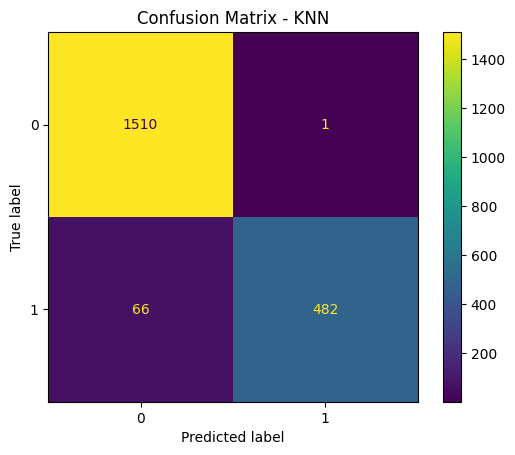


Confusion Matrix for SVC:
[[1511    0]
 [  44  504]]

Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1511
           1       1.00      0.92      0.96       548

    accuracy                           0.98      2059
   macro avg       0.99      0.96      0.97      2059
weighted avg       0.98      0.98      0.98      2059



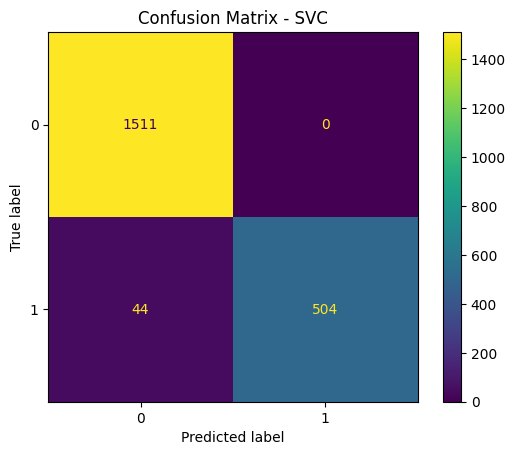


Confusion Matrix for Random Forest:
[[1511    0]
 [ 110  438]]

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1511
           1       1.00      0.80      0.89       548

    accuracy                           0.95      2059
   macro avg       0.97      0.90      0.93      2059
weighted avg       0.95      0.95      0.94      2059



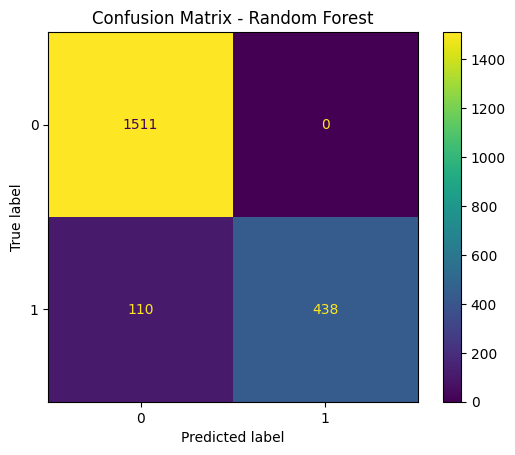


Confusion Matrix for Logistic Regression:
[[1511    0]
 [  20  528]]

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1511
           1       1.00      0.96      0.98       548

    accuracy                           0.99      2059
   macro avg       0.99      0.98      0.99      2059
weighted avg       0.99      0.99      0.99      2059



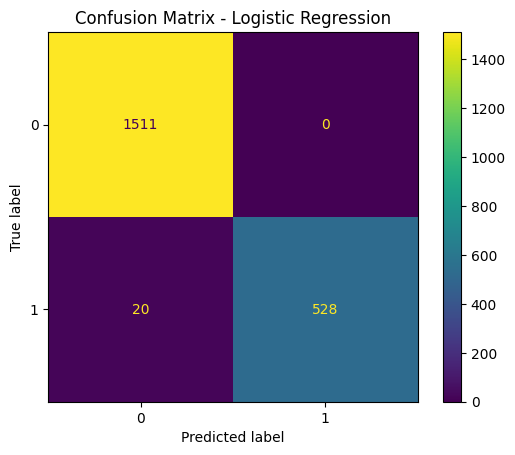


Confusion Matrix for Decision Tree:
[[1511    0]
 [   0  548]]

Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1511
           1       1.00      1.00      1.00       548

    accuracy                           1.00      2059
   macro avg       1.00      1.00      1.00      2059
weighted avg       1.00      1.00      1.00      2059



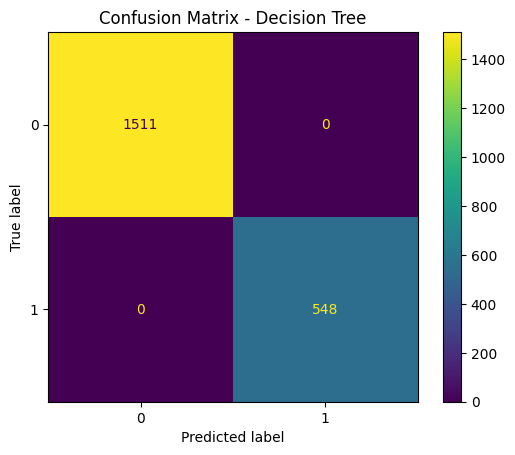

In [110]:
for name, model in models.items():
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix for {name}:\n{cm}")

    
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))

    
    display_labels = sorted(y.unique())  
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot()
    plt.title(f"Confusion Matrix - {name}")
    plt.show()